Projet_ML


**Analsye de la situation acutelle de covid au** **Maroc**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print('Setup Complete')


Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import data 
data = pd.read_csv("/content/dataset_morocco.csv")
data

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,02/03/2020,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/03/2020,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/03/2020,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/03/2020,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/03/2020,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,27/07/2020,20887.0,316.0,16553.0,1147226.0,211.0,5279.0,621.0,69.0,2758.0,161.0,832.0,3351.0,408.0,2235.0,122.0,4844.0
148,28/07/2020,21387.0,327.0,17066.0,1167414.0,217.0,5443.0,629.0,69.0,2918.0,161.0,832.0,3416.0,415.0,2272.0,125.0,4892.0
149,29/07/2020,22213.0,334.0,17125.0,1187822.0,232.0,5729.0,631.0,80.0,3124.0,160.0,838.0,3512.0,423.0,2306.0,127.0,5058.0
150,30/07/2020,23259.0,346.0,17311.0,1207936.0,240.0,5994.0,661.0,84.0,3352.0,161.0,838.0,3629.0,456.0,2401.0,131.0,5318.0




**Convertir la colonne Date en datetime pour une meilleure visualisation**


In [ ]:
data['Date'] = [dt.datetime.strptime(x,  '%d/%m/%Y') for x in data
                ['Date']]

In [ ]:
data

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,2020-03-02,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2020-07-27,20887.0,316.0,16553.0,1147226.0,211.0,5279.0,621.0,69.0,2758.0,161.0,832.0,3351.0,408.0,2235.0,122.0,4844.0
148,2020-07-28,21387.0,327.0,17066.0,1167414.0,217.0,5443.0,629.0,69.0,2918.0,161.0,832.0,3416.0,415.0,2272.0,125.0,4892.0
149,2020-07-29,22213.0,334.0,17125.0,1187822.0,232.0,5729.0,631.0,80.0,3124.0,160.0,838.0,3512.0,423.0,2306.0,127.0,5058.0
150,2020-07-30,23259.0,346.0,17311.0,1207936.0,240.0,5994.0,661.0,84.0,3352.0,161.0,838.0,3629.0,456.0,2401.0,131.0,5318.0


chercher les valures manquantes

In [ ]:
data.isnull().sum().sort_values(ascending = False)

Tanger-Tetouan-Al Hoceima    20
Guelmim-Oued Noun            20
Beni Mellal-Khenifra         20
Draa-Tafilalet               20
Souss-Massa                  20
Dakhla-Oued Ed-Dahab         20
Laayoune-Sakia El Hamra      20
Oriental                     20
Rabat-Sale-Kenitra           20
Fes-Meknes                   19
Marrakesh-Safi               18
Recovered                    18
Casablanca-Settat            17
Deaths                       17
Excluded                      9
Confirmed                     6
Date                          0
dtype: int64

**Remplacerler valeurs manquantes par 0**

In [ ]:
data = data.fillna(0)

In [ ]:
data.head(5)

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-03,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-05,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-06,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Définition de la colonne Date comme index
data = data.set_index('Date')

In [ ]:
#Adding actif case and total tests per day to the dataset
actif_column = data['Confirmed'] - data['Recovered'] - data['Deaths']
total_test_per_day = data['Confirmed'] + data['Excluded']
data['Actif'] = actif_column
data['Total test'] = total_test_per_day

**Représentation graphique du nombre de cas confirmés et de recouvrements.**

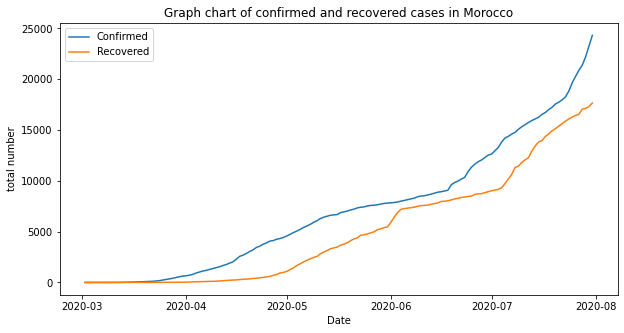

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = data['Confirmed'], label = 'Confirmed' )
sns.lineplot(data = data['Recovered'], label = 'Recovered')
plt.xlabel('Date')
plt.ylabel('total number')
plt.title('Graph chart of confirmed and recovered cases in Morocco')
plt.legend()

**La répartition des nouveaux cas pour les lignes 14 et 15 Avril sur la région n'est pas disponible et cela affectera notre analyse**

In [ ]:
data['2020-04-13':'2020-04-16']

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total test
Date,,,,,,,,,,,,,,,,,,
2020-04-13,1763.0,126.0,203.0,7365.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1434.0,9128.0
2020-04-14,1888.0,126.0,217.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1545.0,9922.0
2020-04-15,2024.0,127.0,229.0,8626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,10650.0
2020-04-16,2283.0,130.0,249.0,10388.0,56.0,681.0,80.0,2.0,317.0,1.0,4.0,487.0,140.0,258.0,27.0,230.0,1904.0,12671.0


In [ ]:
#la solution optimale pour les données manquantes dans cet exemple est de les supprimer.
#plus tard, nous aurons besoin de toutes les colonnes Confirmé, Décès et Récupéré pour toutes les dates à l'exception du 14,15 avril
data_ord = data.copy()


In [ ]:
data = data[data.index != '2020-04-14']
data = data[data.index != '2020-04-15']

Text(0, 0.5, 'Number of tests')

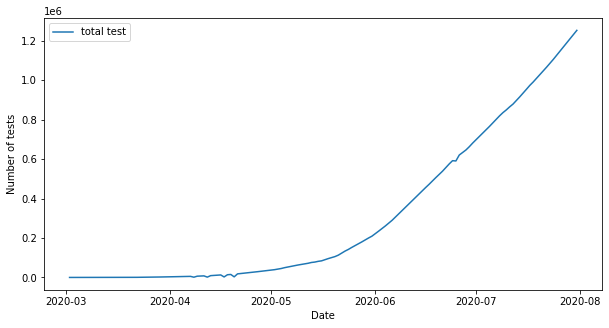

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data = data['Total test'], label = 'total test')
plt.xlabel('Date')
plt.ylabel('Number of tests')



**Correlation between number of tests per day and the new confirmed cases**





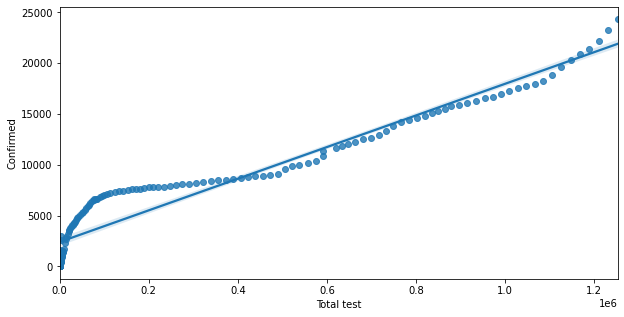

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=data['Total test'], y = data['Confirmed'])

**Graphing the evolution of total cases per regions**

Text(0.5, 1.0, 'Total cases evolution per region')

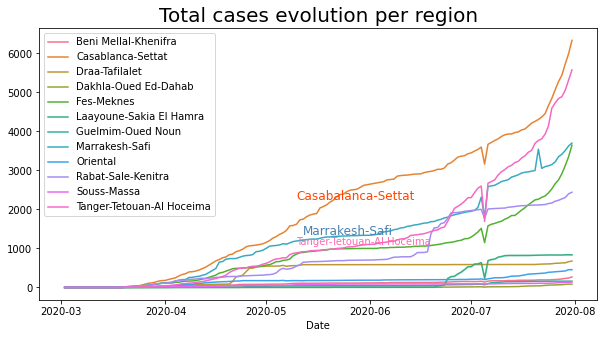

In [ ]:
Regions1 = ['Beni Mellal-Khenifra',
       'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab',
       'Fes-Meknes', 'Laayoune-Sakia El Hamra','Guelmim-Oued Noun', 'Laayoune-Sakia El Hamra',
       'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa','Tanger-Tetouan-Al Hoceima']
plt.figure(figsize=(10,5))
sns.lineplot(data = data[Regions1], dashes= False)
plt.text('2020-05-10', 2250, 'Casabalanca-Settat', fontsize=12,color='#ff4500')
plt.text('2020-05-12', 1350, 'Marrakesh-Safi', fontsize=12,color='#4682B4')
plt.text('2020-05-10', 1100, 'Tanger-Tetouan-Al Hoceima', fontsize=10,color='#FF69B4')
plt.title('Total cases evolution per region',fontsize = 20)

**Graphing actif cases**

<function matplotlib.pyplot.legend>

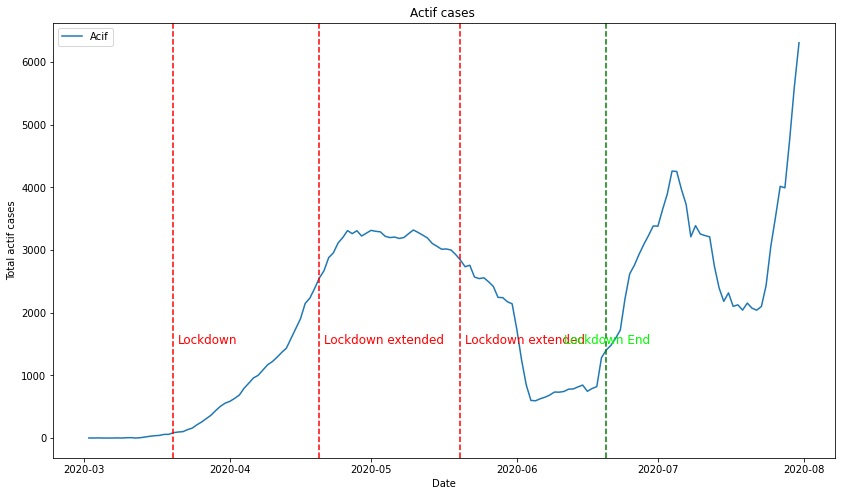

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data = data['Actif'],label='Acif')
plt.axvline('2020-03-20',ls = '--',c = 'r')
plt.axvline('2020-04-20',ls = '--',c = 'r')
plt.axvline('2020-05-20',ls = '--',c = 'r')
plt.axvline('2020-06-20',ls = '--',c = 'g')
plt.text('2020-03-21', 1500, 'Lockdown', fontsize=12,color='#FF0000')
plt.text('2020-04-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-05-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-06-11', 1500, 'Lockdown End', fontsize=12,color='#00FA00')
plt.xlabel('Date')
plt.ylabel('Total actif cases')
plt.title('Actif cases ')
plt.legend

**Pourcentage d'Actif, décès et cas récupérés par jour**

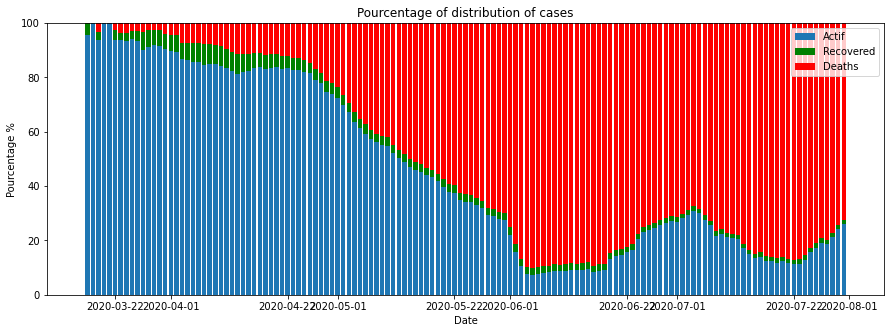

In [ ]:
plt.figure(figsize=(15,5))
dVar1 = (data_ord['Actif']*100/data_ord['Confirmed'])[15:]
dVar2 = (data_ord['Deaths']*100/data_ord['Confirmed'])[15:]
dVar3 = (data_ord['Recovered']*100/data_ord['Confirmed'])[15:]
p1 = plt.bar(dVar1.index, dVar1, label = 'Actif')
p2 = plt.bar(dVar2.index, dVar2, bottom=dVar1,color='g' ,label = 'Recovered')
p3 = plt.bar(dVar3.index, dVar3,bottom=dVar1+dVar2,color='r', label = 'Deaths')
plt.xlabel('Date')
plt.ylabel('Pourcentage %')
plt.title('Pourcentage of distribution of cases')
plt.legend()





Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


**Part 2: Forecasting Total Number of Cases - Deaths and Confirmed Cases**

In [ ]:
# importing Phorphet
from fbprophet import Prophet

In [ ]:
total_deaths = data['Deaths']
total_confirmed = data['Confirmed']
total_recorved = data['Recovered']
mortalty_rate = 100*total_deaths/total_confirmed

In [ ]:
# Ajout d'une nouvelle colonne de cas quotidiens à nos données
new_cases = []
for i in range(len(total_confirmed)):
  if i == 0:
    new_cases.append(0)
  elif total_confirmed[i] < total_confirmed[i-1]:
    new_cases.append(0)
  else:
    temp = int(total_confirmed[i] - total_confirmed[i-1])
    new_cases.append(temp)
new_cases = np.array(new_cases)
data['new_cases'] = new_cases


In [ ]:
df = pd.DataFrame(data['new_cases'])

In [ ]:
df.style.background_gradient(cmap ='Reds')

,new_cases
Date,
2020-03-02 00:00:00,0
2020-03-03 00:00:00,0
2020-03-04 00:00:00,2
2020-03-05 00:00:00,0
2020-03-06 00:00:00,0
2020-03-07 00:00:00,0
2020-03-08 00:00:00,3
2020-03-09 00:00:00,0
2020-03-10 00:00:00,5


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.bar(data, x = data.index, y = "new_cases", color = 'new_cases', orientation ='v', height = 600,
             title = 'Confirmed Cases in Morocco', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data['Confirmed'] , mode = 'lines+markers',
name = 'Total cases'))
fig.add_trace(go.Scatter(x = data.index, y = data['Recovered'] , mode = 'lines+markers',
name = 'Recovered', line = dict(color = 'Green', width = 2)))
fig.add_trace(go.Scatter(x = data.index, y = data['Deaths'] , mode = 'lines+markers',
name = 'Deaths', line = dict(color = 'Red', width = 2)))
fig.update_layout(title_text = 'Trend of Coronavirus Cases in Morocco (Cumulative cases)',plot_bgcolor = 'rgb(230,230,230)')
fig.show()



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data['Actif'] , mode = 'lines+markers',
name = 'Total cases'))
fig.update_layout(title_text='Trend of Actif Coronavirus Cases in Morocco ',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


**Predecting the trend of confirmed cases in the next 10 Days**

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast

In [ ]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.columns = ['ds', 'y']

Generating a 10 days ahead forecast of confirmed cases using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
m = Prophet(interval_width= 0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods = 10)
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
150,2020-08-01
151,2020-08-02
152,2020-08-03
153,2020-08-04
154,2020-08-05
155,2020-08-06
156,2020-08-07
157,2020-08-08
158,2020-08-09
159,2020-08-10


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
150,2020-08-01,22036.013123,21323.570666,22795.812512
151,2020-08-02,22347.012649,21668.218446,23081.801196
152,2020-08-03,22662.601105,21933.164006,23424.175491
153,2020-08-04,22962.783914,22172.997318,23712.808973
154,2020-08-05,23276.830253,22514.206850,24040.093287
155,2020-08-06,23600.815131,22803.209280,24378.788643
156,2020-08-07,23969.493641,23274.252329,24714.532010
157,2020-08-08,24182.583175,23408.381052,24938.380285
158,2020-08-09,24493.582701,23703.571740,25262.001983
159,2020-08-10,24809.171157,23971.788976,25612.596422


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast.ds, y = abs(forecast['yhat'].round()),
                         mode = 'lines+markers', name = 'Predicted daliy cases'))
fig.add_trace(go.Scatter(x =forecast.ds, y =abs(forecast['yhat_lower'].round()),
                         mode ='lines+markers', name = 'Predicted daily cases yhat_lower'))
fig.add_trace(go.Scatter( x =forecast.ds, y =abs(forecast['yhat_upper'].round()),
                         mode ='lines+markers', name = 'Predicted daily cases yhat_upper'))
fig.add_trace(go.Scatter(x=data.index, y = data['Confirmed'], mode= 'lines+markers',name='Daily cases'))

The model predict more new cases in Morocco and it will get worse with the end of restrictions in some provinces

 Predicting the new daily cases

In [ ]:
new_cases = data.groupby('Date').sum()['new_cases'].reset_index()
new_cases.columns = ['ds','y']

In [ ]:
m1 = Prophet(interval_width= 0.95)
m1.fit(new_cases)
fut1 = m1.make_future_dataframe(periods = 10)
fut1.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
155,2020-08-06
156,2020-08-07
157,2020-08-08
158,2020-08-09
159,2020-08-10


In [ ]:
forecast1 = m1.predict(fut1)
forecast1[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
150,2020-08-01,480.507397,237.389128,742.652309
151,2020-08-02,464.351805,214.284253,721.361336
152,2020-08-03,461.807972,219.902484,718.643372
153,2020-08-04,445.591872,200.155530,718.594294
154,2020-08-05,476.394085,231.920836,729.212271
155,2020-08-06,524.020829,260.575939,759.294270
156,2020-08-07,546.910558,313.349344,796.901957
157,2020-08-08,523.736603,286.288455,771.555600
158,2020-08-09,507.581011,254.149330,738.111205
159,2020-08-10,505.037179,255.597471,757.261917


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast1.ds, y = abs(forecast1['yhat'].round()), mode = 'lines+markers', name = 'Predicted daily cases'))
fig.add_trace(go.Scatter(x = data.index, y = data['new_cases'], mode = 'lines+markers', name = 'daily cases'))

**As shown the model predict a stable daily cases for the next 10 days.**

In [ ]:
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns=['ds','y']

In [ ]:
m2 = Prophet(interval_width= 0.95)
m2.fit(deaths)
fut2 = m2.make_future_dataframe(periods = 10)
fut2.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
150,2020-08-01
151,2020-08-02
152,2020-08-03
153,2020-08-04
154,2020-08-05
155,2020-08-06
156,2020-08-07
157,2020-08-08
158,2020-08-09
159,2020-08-10


In [ ]:
forecast2  = m2.predict(fut2)
forecast2[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
150,2020-08-01,328.506934,317.410017,338.934046
151,2020-08-02,332.453598,321.523504,343.358423
152,2020-08-03,336.325747,324.128494,347.110483
153,2020-08-04,339.699091,328.867624,350.722247
154,2020-08-05,342.974131,330.957021,353.503484
155,2020-08-06,347.077468,335.417596,359.944583
156,2020-08-07,350.954488,337.712544,362.960484
157,2020-08-08,353.133817,339.970024,366.692192
158,2020-08-09,357.080481,342.704230,371.536517
159,2020-08-10,360.952629,345.503816,376.462686


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = forecast2.ds, y = abs(forecast2['yhat'].round()), mode = 'lines+markers', name='Predect total deaths'))
fig.add_trace(go.Scatter(x = data.index, y = data['Deaths'], mode = 'lines+markers', name ='Daily cases'))

**Using anther model for predictin new caess and dathes**

The model consists of three compartments: S for the number of susceptible, I for the number of infectious, and R for the number of recovered or deceased (or immune) individuals. This model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella

![Texte alternatif…](https://lh6.googleusercontent.com/WwmVkWAdqQmQpVAKBad1PAVS3AtsLnkbgl2M0k2Tyr6DDPEol1PzpYHeySEIO_dLxqaxJ1NVUmKl5bvlEciMrZtTLsC3vxBmD72xnlX37Wd8p1lBOum2dW4fsDXTw3sm8KjJ8SpnbqWKpJxc2A)

In the model, the value R0 is an estimate of the number of people an average infected person will spread the disease to. If the value of R0 is greater than 1 then the disease probably continues to spread and if it is < 1 then the disease slowly dies down. Since COVID-19’s R0 is > 2, so an average infected person spreads it to 2 or more people who again spread it to 2 or more people and that is how this infection continues to spread across the globe. There are other parameters in the model like and which needs to be estimated. You can read more about the model params and related 

In [ ]:
# c